# Block covariance raw

In [1]:
import pygslib as gslib 
import numpy as np
import matplotlib.pyplot as plt 

#make the plots inline
%matplotlib inline  

In [2]:
parameters_blk = { 
                'xdb'  :  [0 , 0, 1, 1],  # X coordinates of discretazation points
                'ydb'  :  [1 , 0, 1, 0],  # Y coordinates of discretazation points
                'zdb'  :  [0 , 0, 0, 0],  # Z coordinates of discretazation points
                'it'   :  [3, 2],        # structure type,  array('i') with bounds (ivarg)        
                'c0'   :  [0.1],        # nugget,  array('f') with bounds (ivarg)        
                'cc'   :  [0.4, 0.5],   # variance, array('f') with bounds (nvarg*nst[0])
                'aa'   :  [8, 26],       # parameter a (or range), array('f') with bounds (nst)
                'aa1'  :  [8, 26],       # parameter a (or range), array('f') with bounds (nst)
                'aa2'  :  [8, 16],       # parameter a (or range), array('f') with bounds (nst)
                'ang1'   : [0, 0],              # input rank-1 array('d') with bounds (nst)
                'ang2'   : [0, 0],              # input rank-1 array('d') with bounds (nst)
                'ang3'   : [0, 0]}                # input rank-1 array('d') with bounds (nst)

In [3]:
print gslib.block_covariance(parameters_blk)

0.803182760643


Note that the block is defined by discretization points, you can use this function to:
  *  find the covariance of a given block size with regular discretization
  *  find the covariance of a given block size with random discretization
  *  find the covariance of a given polygon defined with discretization points

## example discretization test

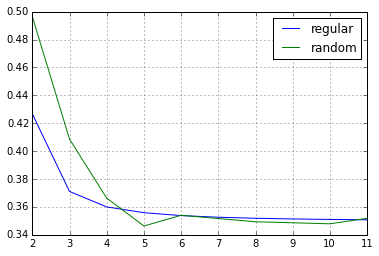

In [6]:
xsize = 10
ysize = 10
maxdis = 10

cbb = np.zeros (maxdis)
cbbr = np.zeros (maxdis)
nn = np.arange (2,maxdis+2)


for n in range(2,maxdis+2): 
    nx, ny = (n, n)
    x = np.linspace(-xsize/2.+xsize/2./n, xsize/2.-xsize/2./n, nx)
    y = np.linspace(-ysize/2.+ysize/2./n, ysize/2.-ysize/2./n , ny)
    xv, yv = np.meshgrid(x, y)
    xdb = xv.ravel() 
    ydb = yv.ravel() 
    xdbr = xdb + np.random.uniform(-xsize/2./n, xsize/2./n,size=len(ydb))
    ydbr = ydb + np.random.uniform(-ysize/2./n, ysize/2./n,size=len(ydb))
    zdb = np.zeros(len(ydb))

    parameters_blk['xdb']=xdbr
    parameters_blk['ydb']=ydbr
    parameters_blk['zdb']=zdb

    cbbr[n-2]= gslib.block_covariance(parameters_blk)

    parameters_blk['xdb']=xdb
    parameters_blk['ydb']=ydb
    parameters_blk['zdb']=zdb

    cbb[n-2]= gslib.block_covariance(parameters_blk)

     
plt.plot (nn, cbb, '-', label= 'regular')
plt.plot (nn, cbbr, '-', label= 'random')
plt.legend()
plt.grid(True)
plt.show()

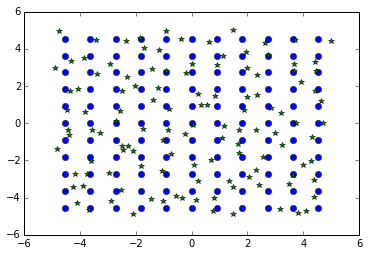

In [7]:
plt.plot(xdb, ydb, 'o')
plt.plot(xdbr, ydbr, '*')    
